Tensorflow Decision Forest

In [ ]:
pip install tensorflow_decision_forests


     |████████████████████████████████| 13.4 MB 4.7 MB/s 
     |████████████████████████████████| 462 kB 49.5 MB/s 


In [ ]:
pip install wurlitzer

In [ ]:
import tensorflow_decision_forests as tfdf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes

from IPython.core.magic import register_line_magic
from IPython.display import Javascript

In [ ]:
df = pd.read_csv("/content/df3.csv")
df = df.drop(columns=['Unnamed: 0','Modal','jumlah_pegawai','omset','target_pasar'])
# Display the first 3 examples.
df.head(3)

,jenis_usaha,modal_minimum,modal_maximum,tingkat_persaingan,pegawai_minimum,omset_minimum,tp_b,tp_m,tp_a,lokasi,...,barang_dropship,penyimpanan_barang,biaya_internet,internet_minimum,sosial_media,barang_toserba,toko_toserba,tipe_toko,usaha_lain,tipe_usaha_lain
0,Transportasi,25000000.0,100000000.0,Sedang,2,50000000.0,0,1,1,Perkotaan,...,no_info,no_info,no_info,0,no_info,no_info,no_info,no_info,jasa sewa kendaraan,EX
1,Perternakan,10000000.0,25000000.0,Sedang,1,25000000.0,1,1,1,Pedesaan/Perkampungan,...,no_info,no_info,no_info,0,no_info,no_info,no_info,no_info,no_info,no_info
2,Toserba/Toko Kelontong,1000000.0,10000000.0,Sedang,1,1000000.0,1,1,0,Pedesaan/Perkampungan,...,no_info,no_info,no_info,0,no_info,Sembako,True,Ruko,no_info,no_info


In [ ]:
df['tingkat_persaingan'] = df['tingkat_persaingan'].map(df['tingkat_persaingan'].unique().tolist().index)

In [ ]:
label = "jenis_usaha"

classes = df[label].unique().tolist()
print(f"Label classes: {classes}")

df[label] = df[label].map(classes.index)
df.head()

Label classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


,jenis_usaha,modal_minimum,modal_maximum,tingkat_persaingan,pegawai_minimum,omset_minimum,tp_b,tp_m,tp_a,lokasi,...,barang_dropship,penyimpanan_barang,biaya_internet,internet_minimum,sosial_media,barang_toserba,toko_toserba,tipe_toko,usaha_lain,tipe_usaha_lain
0,0,25000000.0,100000000.0,0,2,50000000.0,0,1,1,Perkotaan,...,no_info,no_info,no_info,0,no_info,no_info,no_info,no_info,jasa sewa kendaraan,EX
1,1,10000000.0,25000000.0,0,1,25000000.0,1,1,1,Pedesaan/Perkampungan,...,no_info,no_info,no_info,0,no_info,no_info,no_info,no_info,no_info,no_info
2,2,1000000.0,10000000.0,0,1,1000000.0,1,1,0,Pedesaan/Perkampungan,...,no_info,no_info,no_info,0,no_info,Sembako,True,Ruko,no_info,no_info
3,3,1000000.0,10000000.0,0,1,1000000.0,0,1,0,Pedesaan/Perkampungan,...,no_info,no_info,no_info,0,no_info,no_info,no_info,no_info,no_info,no_info
4,4,1000000.0,10000000.0,1,1,1000000.0,1,0,0,Perkotaan,...,Baju,Rumah,100-200 ribu,100000,WA,no_info,no_info,no_info,no_info,no_info


In [ ]:
training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

# No. of training examples: 120
# No. of testing examples: 30

No. of training examples: 106
No. of testing examples: 27


In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(training_data, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(testing_data, label=label)

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core.py:2036: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


In [ ]:
model_1 = tfdf.keras.RandomForestModel(num_trees=100)

# Optionally, add evaluation metrics.
model_1.compile(metrics=["accuracy"])

# Train the model.
# "sys_pipes" is optional. It enables the display of the training logs.
model_1.fit(train_ds)

evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

Use /tmp/tmpd9e5pt9n as temporary training directory
Starting reading the dataset
1/1 [==============================] - ETA: 0s
Dataset read in 0:00:00.339545
Training model
Model trained in 0:00:00.070871
Compiling model
1/1 [==============================] - 0s 263ms/step - loss: 0.0000e+00 - accuracy: 0.9259



AttributeError: ignored

AssertionError: ignored

In [ ]:
model_inspector = model_1.make_inspector()
out_of_bag_accuracy = model_inspector.evaluation().accuracy
print(f"Out-of-bag accuracy: {out_of_bag_accuracy:.4f}")

Out-of-bag accuracy: 0.7925


In [ ]:
model_1.compile(["accuracy"])
test_accuracy = model_1.evaluate(test_ds, return_dict=True, verbose=0)["accuracy"]
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9259


In [ ]:
print("The model contains", model_inspector.num_trees(), "trees.")
print("The test dataset contains", df.shape[0], "examples.")

The model contains 100 trees.
The test dataset contains 133 examples.


In [ ]:
leaves = model_1.predict_get_leaves(test_ds)
print("The leaf indices:\n", leaves)

The leaf indices:
 [[ 4  8 10 ...  3  0  3]
 [ 1  1  7 ...  0  6  0]
 [ 1  1  7 ...  0  6  0]
 ...
 [ 4  8 10 ...  3  0  3]
 [ 4  8 10 ...  3  0  3]
 [ 4  8 10 ...  3  0  3]]


In [ ]:
print("The predicted leaves have shape", leaves.shape,
      "(we expect [num_examples, num_trees]")

The predicted leaves have shape (27, 100) (we expect [num_examples, num_trees]


In [ ]:
df.head(1)

,jenis_usaha,modal_minimum,modal_maximum,tingkat_persaingan,pegawai_minimum,omset_minimum,tp_b,tp_m,tp_a,lokasi,...,barang_dropship,penyimpanan_barang,biaya_internet,internet_minimum,sosial_media,barang_toserba,toko_toserba,tipe_toko,usaha_lain,tipe_usaha_lain
0,0,25000000.0,100000000.0,Sedang,2,50000000.0,0,1,1,Perkotaan,...,no_info,no_info,no_info,0,no_info,no_info,no_info,no_info,jasa sewa kendaraan,EX


In [ ]:
predictions = model_1.predict([[1000000,10000000,'Sedang',2,3000000]])

AssertionError: ignored

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=8)

In [ ]:
df.head

<bound method NDFrame.head of      jenis_usaha  modal_minimum  modal_maximum tingkat_persaingan  \
0              0     25000000.0    100000000.0             Sedang   
1              1     10000000.0     25000000.0             Sedang   
2              2      1000000.0     10000000.0             Sedang   
3              3      1000000.0     10000000.0             Sedang   
4              4      1000000.0     10000000.0             Rendah   
..           ...            ...            ...                ...   
128            1     10000000.0     25000000.0             Sedang   
129            1     10000000.0     25000000.0             Sedang   
130            1      1000000.0     10000000.0             Sedang   
131            1     10000000.0     25000000.0             Sedang   
132            1      1000000.0     10000000.0             Sedang   

     pegawai_minimum  omset_minimum  tp_b  tp_m  tp_a                 lokasi  \
0                  2     50000000.0     0     1     1        

In [ ]:
Xnew = ([[1000000]])

In [ ]:
model_1.summary()

Model: "random_forest_model_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (27):
	barang_dropship
	barang_toserba
	biaya_internet
	hewan_ternak
	internet_minimum
	kemampuan_masak
	lahan_minimum
	lokasi
	lokasi_geografis
	luas_lahan
	mengerti_hewan
	modal_maximum
	modal_minimum
	omset_minimum
	pegawai_minimum
	penyimpanan_barang
	sosial_media
	tingkat_persaingan
	tipe_toko
	tipe_usaha_kuliner
	tipe_usaha_lain
	toko_toserba
	tp_a
	tp_b
	tp_m
	usaha_kuliner
	usaha_lain

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1.               "tp_m"  3.864457 ################
    2.            "__LABEL"  3.864457 ################
    3. "penyimpanan_barang"  3.833083 ###############
    4.   "internet_minim

In [ ]:
model_1.make_inspector().evaluation()

Evaluation(num_examples=106, accuracy=0.7924528301886793, loss=4.742869625729069, rmse=None, ndcg=None, aucs=None)

In [ ]:
model_1.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=31, accuracy=0.5483870967741935, loss=16.27777813326928, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=92, accuracy=0.40217391304347827, loss=14.8361630441378, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=92, accuracy=0.44565217391304346, loss=13.042092542609442, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=31, evaluation=Evaluation(num_examples=92, accuracy=0.42391304347826086, loss=12.710513320630012, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=41, evaluation=Evaluation(num_examples=93, accuracy=0.43010752688172044, loss=11.910389815887777, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=51, evaluation=Evaluation(num_examples=93, accuracy=0.41935483870967744, loss=11.916976532988972, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=61, evaluation=Evaluation(num_examples=93, accuracy=0.4193548387096

In [ ]:
pred = model_1.predict(test_ds)

In [ ]:
df.head()

,jenis_usaha,modal_minimum,modal_maximum,pegawai_minimum,omset_minimum,tp_b,tp_m,tp_a
0,0,25000000.0,100000000.0,2,50000000.0,0,1,1
1,1,10000000.0,25000000.0,1,25000000.0,1,1,1
2,2,1000000.0,10000000.0,1,1000000.0,1,1,0
3,3,1000000.0,10000000.0,1,1000000.0,0,1,0
4,4,1000000.0,10000000.0,1,1000000.0,1,0,0


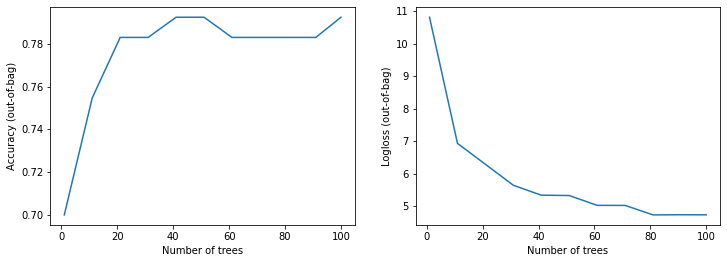

In [ ]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [ ]:
df.head()

<bound method NDFrame.head of      jenis_usaha  modal_minimum  modal_maximum tingkat_persaingan  \
0              0     25000000.0    100000000.0             Sedang   
1              1     10000000.0     25000000.0             Sedang   
2              2      1000000.0     10000000.0             Sedang   
3              3      1000000.0     10000000.0             Sedang   
4              4      1000000.0     10000000.0             Rendah   
..           ...            ...            ...                ...   
128            1     10000000.0     25000000.0             Sedang   
129            1     10000000.0     25000000.0             Sedang   
130            1      1000000.0     10000000.0             Sedang   
131            1     10000000.0     25000000.0             Sedang   
132            1      1000000.0     10000000.0             Sedang   

     pegawai_minimum  omset_minimum  tp_b  tp_m  tp_a                 lokasi  \
0                  2     50000000.0     0     1     1        

In [ ]:
# Download the dataset
!wget -q https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv -O /tmp/penguins.csv

# Load a dataset into a Pandas Dataframe.
dataset_df = pd.read_csv("/tmp/penguins.csv")

# Show the first three examples.
print(dataset_df.head(3))

# Convert the pandas dataframe into a tf dataset.
dataset_tf = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="species")

# Train the Random Forest
model = tfdf.keras.RandomForestModel(compute_oob_variable_importances=True)
model.fit(x=dataset_tf)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
Use /tmp/tmpt899444u as temporary training directory
Starting reading the dataset


/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core.py:2036: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


1/1 [==============================] - ETA: 0s
Dataset read in 0:00:00.340877
Training model
Model trained in 0:00:00.216220
Compiling model
1/1 [==============================] - 1s 596ms/step


In [ ]:
model.summary()

Model: "random_forest_model_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (7):
	bill_depth_mm
	bill_length_mm
	body_mass_g
	flipper_length_mm
	island
	sex
	year

No weights

Variable Importance: MEAN_DECREASE_IN_ACCURACY:
    1.    "bill_length_mm"  0.151163 ################
    2.            "island"  0.008721 #
    3.     "bill_depth_mm"  0.000000 
    4.       "body_mass_g"  0.000000 
    5.               "sex"  0.000000 
    6.              "year"  0.000000 
    7. "flipper_length_mm" -0.002907 

Variable Importance: MEAN_DECREASE_IN_AP_1_VS_OTHERS:
    1.    "bill_length_mm"  0.083305 ################
    2.            "island"  0.007664 #
    3. "flipper_length_mm"  0.003400 
    4.     "bill_

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

In [ ]:
inspector = model.make_inspector()

In [ ]:
[field for field in dir(inspector) if not field.startswith("_")]

['MODEL_NAME',
 'dataspec',
 'evaluation',
 'export_to_tensorboard',
 'extract_all_trees',
 'extract_tree',
 'features',
 'header',
 'iterate_on_nodes',
 'label',
 'label_classes',
 'metadata',
 'model_type',
 'num_trees',
 'objective',
 'specialized_header',
 'task',
 'training_logs',
 'variable_importances',
 'winner_take_all_inference']

In [ ]:
?inspector.model_type

In [ ]:
print("Model type:", inspector.model_type())
print("Number of trees:", inspector.num_trees())
print("Objective:", inspector.objective())
print("Input features:", inspector.features())

Model type: RANDOM_FOREST
Number of trees: 300
Objective: Classification(label=__LABEL, class=None, num_classes=3)
Input features: ["bill_depth_mm" (1; #0), "bill_length_mm" (1; #1), "body_mass_g" (1; #2), "flipper_length_mm" (1; #3), "island" (4; #4), "sex" (4; #5), "year" (1; #6)]


In [ ]:
inspector.evaluation()

Evaluation(num_examples=344, accuracy=0.9767441860465116, loss=0.06894904488784283, rmse=None, ndcg=None, aucs=None)

In [ ]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 MEAN_DECREASE_IN_PRAUC_1_VS_OTHERS
	 SUM_SCORE
	 MEAN_DECREASE_IN_AUC_2_VS_OTHERS
	 MEAN_DECREASE_IN_PRAUC_2_VS_OTHERS
	 MEAN_DECREASE_IN_AUC_3_VS_OTHERS
	 NUM_NODES
	 MEAN_DECREASE_IN_PRAUC_3_VS_OTHERS
	 MEAN_MIN_DEPTH
	 MEAN_DECREASE_IN_AUC_1_VS_OTHERS
	 MEAN_DECREASE_IN_AP_1_VS_OTHERS
	 MEAN_DECREASE_IN_ACCURACY
	 NUM_AS_ROOT
	 MEAN_DECREASE_IN_AP_3_VS_OTHERS
	 MEAN_DECREASE_IN_AP_2_VS_OTHERS


In [ ]:
inspector.variable_importances()["MEAN_DECREASE_IN_AUC_1_VS_OTHERS"]

[("bill_length_mm" (1; #1), 0.0713061951754389),
 ("island" (4; #4), 0.007298519736842035),
 ("flipper_length_mm" (1; #3), 0.004505893640351366),
 ("bill_depth_mm" (1; #0), 0.0021244517543865804),
 ("body_mass_g" (1; #2), 0.0005482456140351033),
 ("sex" (4; #5), 0.00047971491228060437),
 ("year" (1; #6), 0.0)]

In [ ]:
inspector.extract_tree(tree_idx=0)

Tree(NonLeafNode(condition=(bill_length_mm >= 43.25; miss=True), pos_child=NonLeafNode(condition=(island in ['Biscoe']; miss=True), pos_child=NonLeafNode(condition=(bill_depth_mm >= 17.225584030151367; miss=False), pos_child=LeafNode(value=ProbabilityValue([0.16666666666666666, 0.0, 0.8333333333333334],n=6.0), idx=7), neg_child=LeafNode(value=ProbabilityValue([0.0, 0.0, 1.0],n=104.0), idx=6), value=ProbabilityValue([0.00909090909090909, 0.0, 0.990909090909091],n=110.0)), neg_child=LeafNode(value=ProbabilityValue([0.0, 1.0, 0.0],n=61.0), idx=5), value=ProbabilityValue([0.005847953216374269, 0.3567251461988304, 0.6374269005847953],n=171.0)), neg_child=NonLeafNode(condition=(bill_depth_mm >= 15.100000381469727; miss=True), pos_child=NonLeafNode(condition=(flipper_length_mm >= 187.5; miss=True), pos_child=LeafNode(value=ProbabilityValue([1.0, 0.0, 0.0],n=104.0), idx=4), neg_child=NonLeafNode(condition=(bill_length_mm >= 42.30000305175781; miss=True), pos_child=LeafNode(value=ProbabilityVal

In [ ]:
# Create the model builder
builder = tfdf.builder.RandomForestBuilder(
    path="/tmp/manual_model",
    objective=tfdf.py_tree.objective.ClassificationObjective(
        label="color", classes=["red", "blue", "green"]))

In [ ]:
# So alias
Tree = tfdf.py_tree.tree.Tree
SimpleColumnSpec = tfdf.py_tree.dataspec.SimpleColumnSpec
ColumnType = tfdf.py_tree.dataspec.ColumnType
# Nodes
NonLeafNode = tfdf.py_tree.node.NonLeafNode
LeafNode = tfdf.py_tree.node.LeafNode
# Conditions
NumericalHigherThanCondition = tfdf.py_tree.condition.NumericalHigherThanCondition
CategoricalIsInCondition = tfdf.py_tree.condition.CategoricalIsInCondition
# Leaf values
ProbabilityValue = tfdf.py_tree.value.ProbabilityValue

builder.add_tree(
    Tree(
        NonLeafNode(
            condition=NumericalHigherThanCondition(
                feature=SimpleColumnSpec(name="f1", type=ColumnType.NUMERICAL),
                threshold=1.5,
                missing_evaluation=False),
            pos_child=NonLeafNode(
                condition=CategoricalIsInCondition(
                    feature=SimpleColumnSpec(name="f2",type=ColumnType.CATEGORICAL),
                    mask=["cat", "dog"],
                    missing_evaluation=False),
                pos_child=LeafNode(value=ProbabilityValue(probability=[0.8, 0.1, 0.1], num_examples=10)),
                neg_child=LeafNode(value=ProbabilityValue(probability=[0.1, 0.8, 0.1], num_examples=20))),
            neg_child=LeafNode(value=ProbabilityValue(probability=[0.1, 0.1, 0.8], num_examples=30)))))

In [ ]:
builder.close()

Use /tmp/tmppv92mush as temporary training directory


INFO:tensorflow:Assets written to: /tmp/manual_model/assets


INFO:tensorflow:Assets written to: /tmp/manual_model/assets


In [ ]:
manual_model = tf.keras.models.load_model("/tmp/manual_model")

In [ ]:
examples = tf.data.Dataset.from_tensor_slices({
        "f1": [1.0, 2.0, 3.0],
        "f2": ["cat", "cat", "bird"]
    }).batch(2)

predictions = manual_model.predict(examples)

print("predictions:\n",predictions)

predictions:
 [[0.1 0.1 0.8]
 [0.8 0.1 0.1]
 [0.1 0.8 0.1]]


In [ ]:
yggdrasil_model_path = manual_model.yggdrasil_model_path_tensor().numpy().decode("utf-8")
print("yggdrasil_model_path:",yggdrasil_model_path)

inspector = tfdf.inspector.make_inspector(yggdrasil_model_path)
print("Input features:", inspector.features())

yggdrasil_model_path: /tmp/manual_model/assets/
Input features: ["f1" (1; #1), "f2" (4; #2)]


In [ ]:
tfdf.model_plotter.plot_model_in_colab(manual_model)